# Visualizing Neuroimaging Data

Nilearn provides a comprehensive set of plotting functions specifically designed for neuroimaging data (Nifti-like volumes, surface meshes, and connectivity matrices).

These functions allow for easy visualization of brain images, statistical maps mapped onto anatomical images or onto glass brain representation, anatomical images, functional/EPI images, region specific mask images.

These functions are located in the Nilearn **`plotting`** module.

## Volumetric (Nifti) Plotting Functions

These functions visualize 3D or 4D anatomical or statistical volumes.

* **`plot_img`**: A general-purpose function for plotting any Nifti image.
* **`plot_anat`**: Plots anatomical images (T1, T2, etc.).
* **`plot_epi`**: Plots Echo Planar Imaging (EPI) or T2* images.
* **`plot_stat_map`**: Plots statistical maps (Z-map, T-map) with an optional anatomical background.
* **`plot_roi`**: Plots Regions of Interest (ROIs) or binary masks.
* **`plot_prob_atlas`**: Plots 4D probabilistic atlas maps.
* **`plot_glass_brain`**: Displays a 3D visualization of maximum intensity projections (glass brain).
* **`plot_carpet`**: Plots voxel intensities across time (useful for fMRI quality control).

## Surface Plotting Functions

These functions map data onto cortical surfaces.

* **`plot_surf_stat_map`**: Plots statistical maps onto a cortical mesh.
* **`plot_surf_roi`**: Plots surface ROIs.
* **`plot_surf_contours`**: Plots the outline of ROIs on a surface.
* **`plot_img_on_surf`**: Projects a 3D statistical map onto a cortical surface.

## Connectome and Marker Plotting

These functions visualize graph-based connectivity or network nodes.

* **`plot_connectome`**: Plots a connectome graph, where nodes are coordinates and edges are intensities from an adjacency matrix.
* **`plot_markers`**: Plots network nodes (markers) on a glass brain and color-codes them.

## Other Specialized Plots

* **`plot_design_matrix`**: Visualizes a GLM design matrix.
* **`plot_matrix`**: Plots a 2D matrix (e.g., correlation matrix).
* **`plot_event`**: Visualizes experimental event timecourses.

## Interactive & Web-Based Plotting

These functions return web-based viewers (using Plotly or Brainsprite).

* **`view_img(stat_map_img, ...)`**: Interactive slice viewer.
* **`view_surf(surf_mesh, ...)`**: Interactive 3D surface viewer.
* **`view_img_on_surf(stat_map_img, ...)`**: Projects a volume onto a surface for interactive viewing.
* **`view_connectome(...)`**: Interactive 3D connectome viewer.
* **`view_markers(...)`**: Interactive 3D marker viewer.

## Key Plotting Options & Parameters

* **`cut_coords`**: Specifies the world coordinates (x, y, z) for the slices. If set to None, cuts are calculated automatically to center on the data.
* **`display_mode`**: Controls the arrangement of slices. Options include:
    * `'ortho'`: 3 orthogonal cuts (default).
    * `'x'`, `'y'`, or `'z'`: Single-direction cuts (`'x'`: sagittal, `'y'`: coronal, or `'z'`: axial).
    * `'tiled'`: 3 cuts arranged in a 2x2 grid.
    * `'mosaic'`: Multiple cuts automatically positioned across the brain.
* **`cmap`**: Defines the matplotlib colormap used for the image.
* **`threshold`**: If provided, values below this number (in absolute value) are rendered as transparent.
* **`symmetric_cbar`**: Ensures the colorbar is symmetric around zero.
* **`output_file`**: Saves the plot directly to a file (png, pdf, svg).

## Install Nilearn

In [1]:
!pip install -q nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 81.1 MB/s eta 0:00:00


## Import **`datasets`** and **`plotting`** Modules

In [2]:
# import datasets and plotting modules
from nilearn import datasets, plotting

## Visualizing 3D Neuroimaging Data

### The **`plot_img`** Function

The **`plot_img`** is a general-purpose function used to visualize 3D neuroimaging data.

It serves as the foundation for more specialized plotting functions (like **`plot_stat_map`** or **`plot_roi`**) and provides a flexible way to display brain volumes in various orthogonal or custom slice views.

It accepts a Niimg-like object as argument.

#### Example Usage

We work with the MNI152 T1-weighted template.

It is a widely used, high-resolution average structural brain image created by the Montreal Neurological Institute (MNI) from 152 healthy young adult participants.

It serves as a standardized coordinate system for comparing brain imaging data across different individuals and studies.

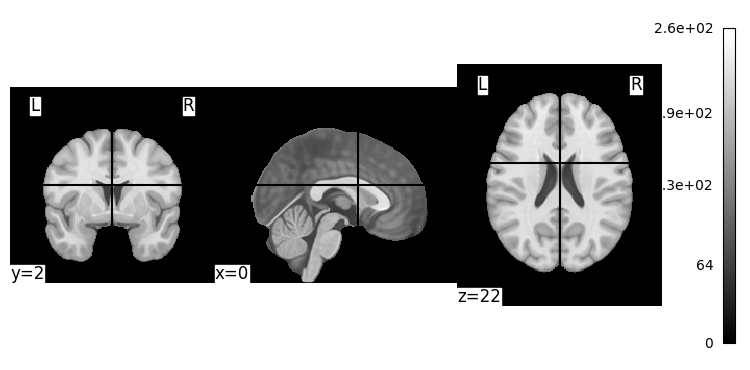

In [3]:
# load dataset
from nilearn.datasets import MNI152_FILE_PATH

# plot data
plotting.plot_img(MNI152_FILE_PATH)


Plot data with display mode set to sagittal:

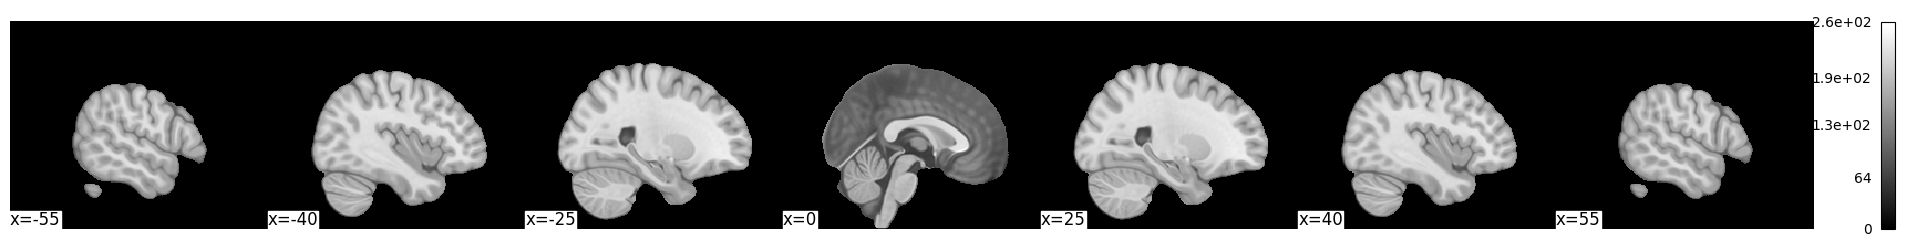

In [ ]:
# plot data with display mode set to sagittal
plotting.plot_img(MNI152_FILE_PATH, display_mode='x')

Plot data with display mode set to coronal:

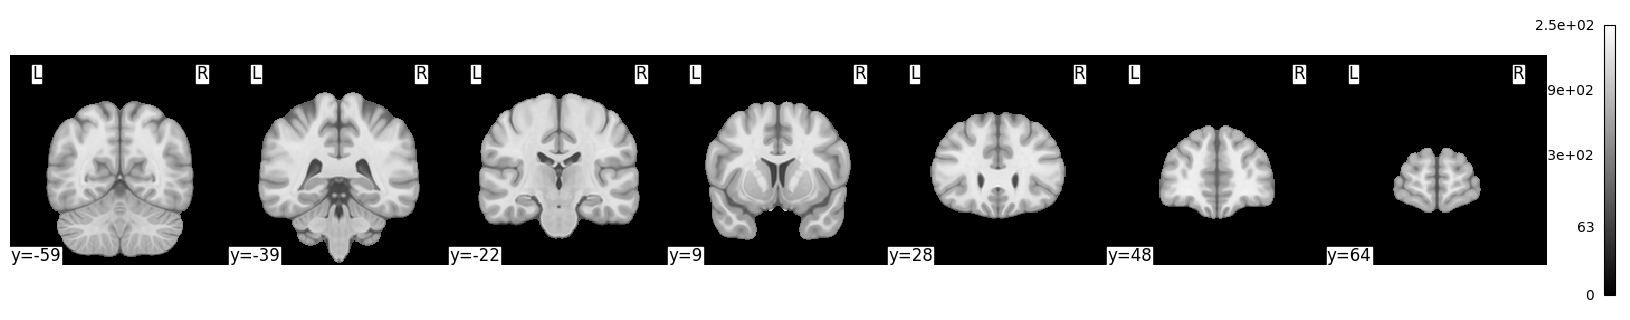

In [ ]:
# plot data with display mode set to coronal
plotting.plot_img(MNI152_FILE_PATH, display_mode='y')

Plot data with display mode set to axial:

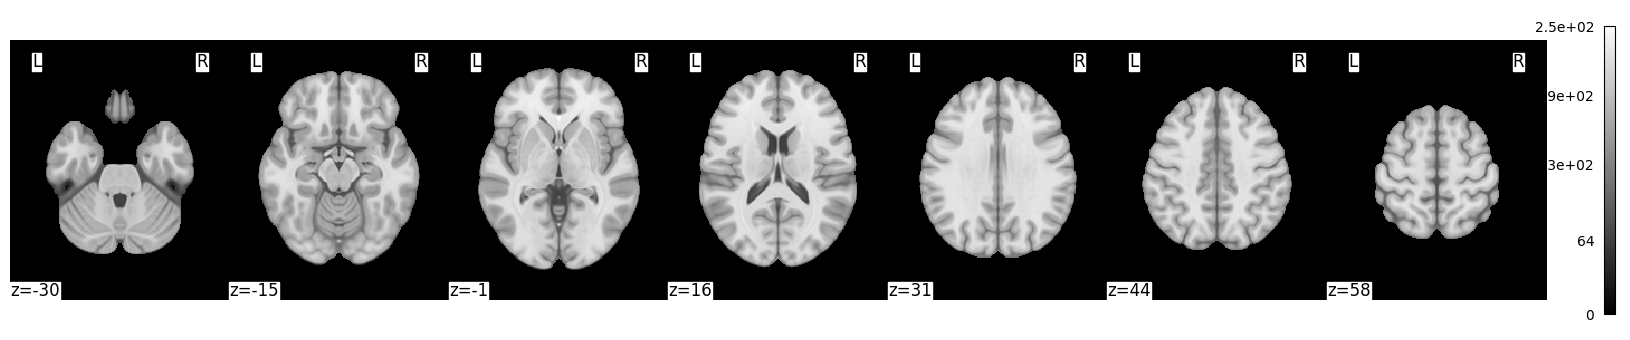

In [ ]:
# plot data with display mode set to axial
plotting.plot_img(MNI152_FILE_PATH, display_mode='z')

## Plotting Statistical Maps

### Statistical Brain Maps

Statistical brain maps are quantitative visual representations of brain data, used primarily to localize functions or identify abnormalities.

They transform raw neuroimaging data into spatial layouts that highlight significant patterns, such as where blood flow increases during a specific task or where brainwave frequencies deviate from the norm.

### The **`plot_stat_map`** Function

**`plot_stat_map`** is a core function in the Nilearn library used to visualize statistical brain maps—such as T-maps, Z-maps, or ICA maps—as 2D slices overlaid on an anatomical background.

By default, it displays orthogonal cuts (axial, coronal, and sagittal).

It accepts a Niimg-like object as argument.

#### Example Usage: Visualizing a 3D Image

We work with a file containing a single, pre-computed 3D NIfTI image showing motor activation.

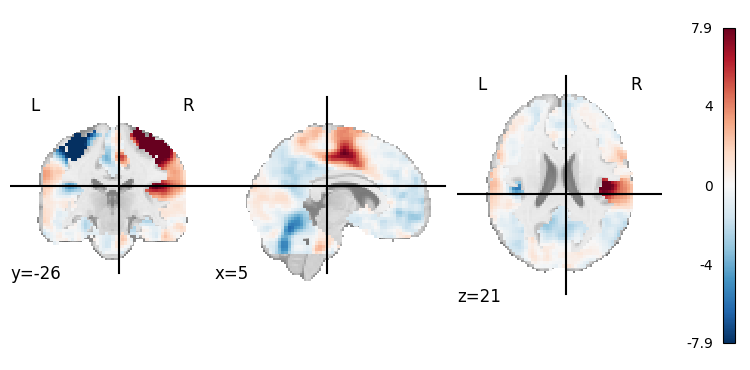

In [4]:
# load data file: one motor activation map
sma_file = datasets.load_sample_motor_activation_image()

# visualize image as a statistical map
plotting.plot_stat_map(sma_file)

## Visualizing Volumes in a 4D Image

We work with a resting-state networks from the Smith 2009 study on correspondence between rest and task.

The data file contains spatial maps of brain networks from the Smith et al. (2009) study, which identified major functional networks using Independent Component Analysis (ICA).

**Fetch data file:**

In [5]:
# fetch data file
rsn_file = datasets.fetch_atlas_smith_2009(resting=True, dimension=10)["maps"]

[fetch_atlas_smith_2009] Added README.md to /root/nilearn_data

[fetch_atlas_smith_2009] Dataset created in /root/nilearn_data/smith_2009

[fetch_atlas_smith_2009] Downloading data from 
https://www.fmrib.ox.ac.uk/datasets/brainmap+rsns/PNAS_Smith09_rsn10.nii.gz ...

[fetch_atlas_smith_2009] Downloaded 4276224 of 7565016 bytes (56.5%%,    0.8s remaining)

[fetch_atlas_smith_2009]  ...done. (2 seconds, 0 min)

The Nilearn **`load_img`** is the standard function for loading neuroimaging data an converting it into an in-memory **`NiftiImage`** object.

It is part of the **`image`** module.

**Load data:**

In [6]:
from nilearn import image

# Load data
rsn_image = image.load_img(rsn_file)

# Check the image shape
print(rsn_image.shape)


(91, 109, 91, 10)


### Visualizing One Volume

We retrieve the first volume:

In [7]:
# retrieve the first volume
first_rsn_image = image.index_img(rsn_image, 0)

# check image shape
print(first_rsn_image.shape)

(91, 109, 91)


We plot the 3D image:

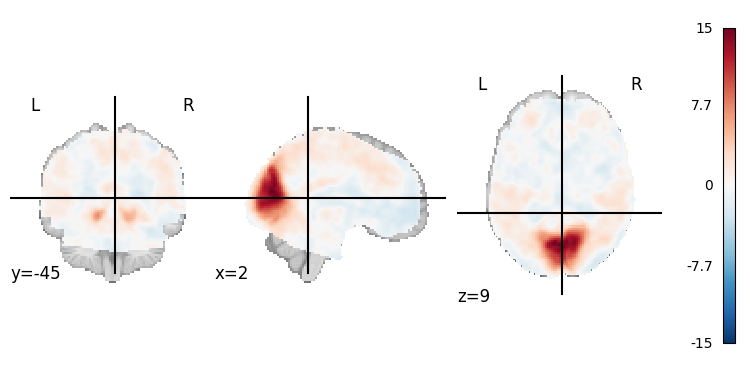

In [8]:
# visualize image as a statistical map
plotting.plot_stat_map(first_rsn_image)

### Looping Across all Volumes

The Nilearn **`image.iter_img`** function is used to iterate over the individual volumes of a 4D neuroimaging object.

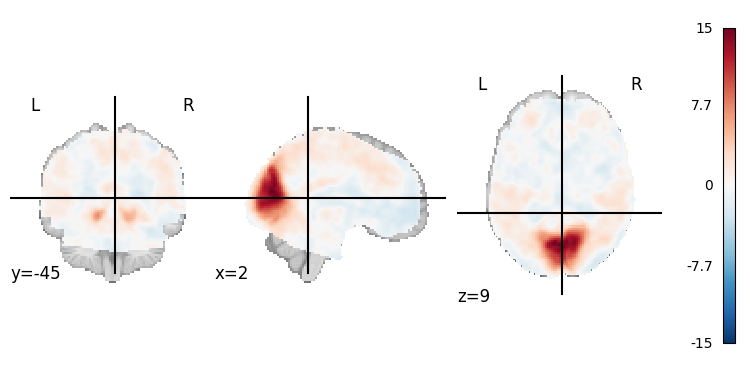

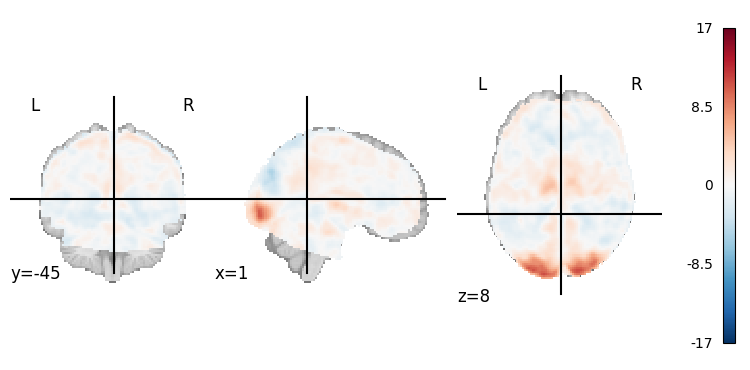

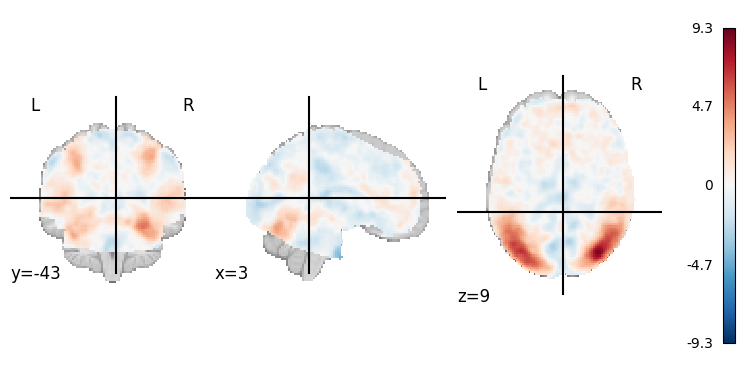

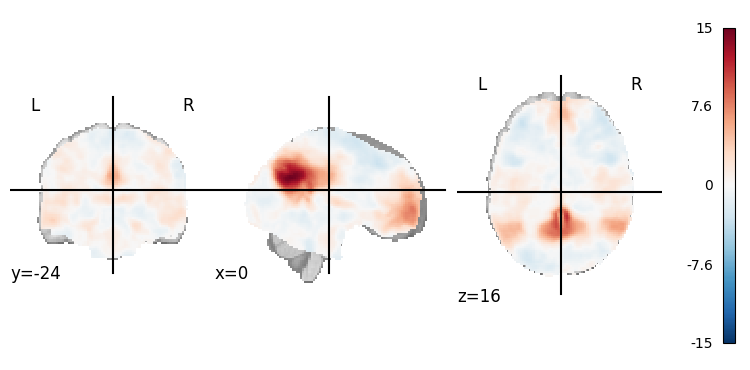

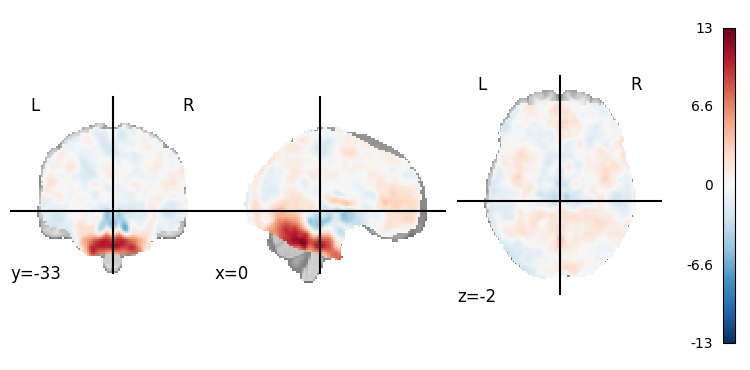

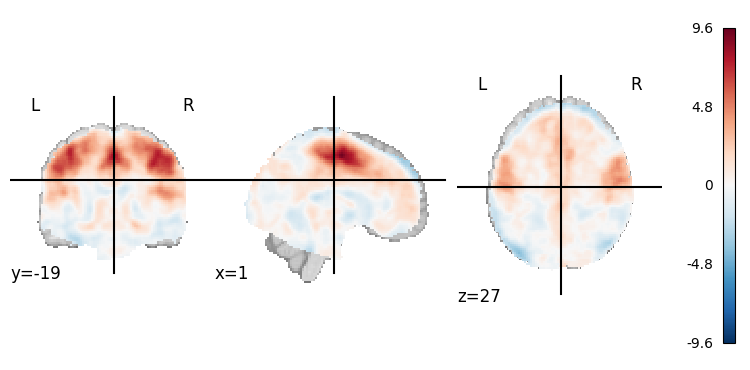

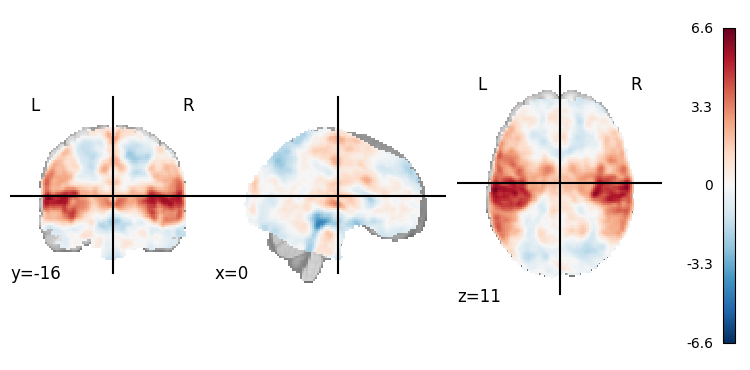

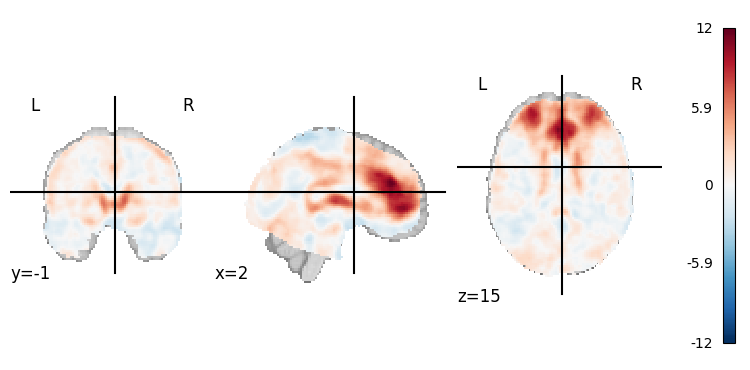

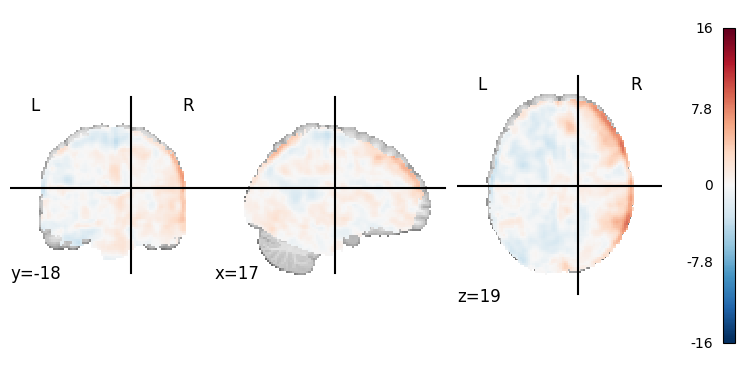

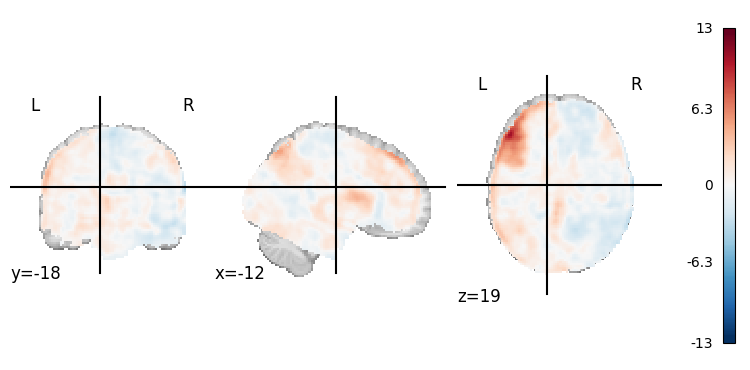

In [9]:
# loop through all volumes
for img in image.iter_img(rsn_image):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img)

### Looping Through Selected Volumes

The Nilearn **`image.index_img`** function is used to select one or more volumes from a 4D Nifti image.

It returns a new Nifti-like image object containing only the selected volumes.

It takes as parameter an index that is compatible with numpy array indexing, and used for indexing the data array in the last dimension.

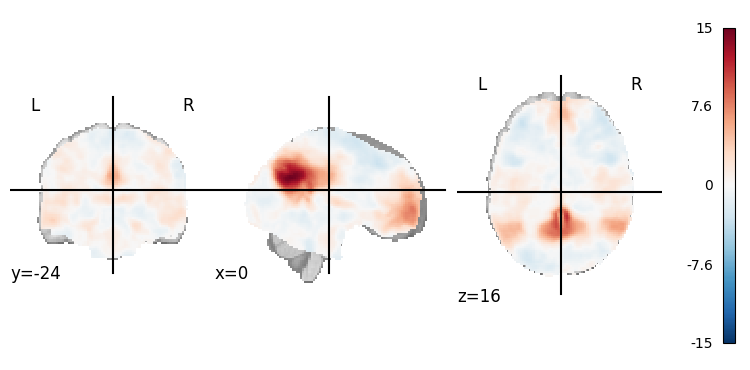

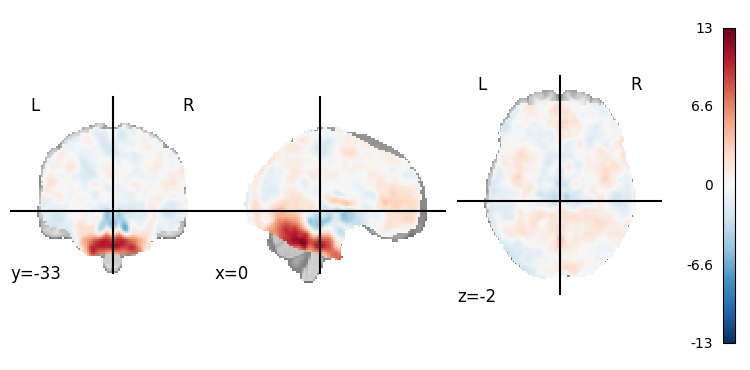

In [10]:
# select the volumes with indices 3 and 4
selected_volumes = image.index_img(rsn_image, slice(3, 5))

# loop through selected volumes
for img in image.iter_img(selected_volumes):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img)

## Plotting Statistical Maps in a Glass Brain

### The **`plot_glass_brain`** Function

**`plot_glass_brain`** is a high-level function used to create 2D "maximum intensity projections" of brain volumes, making them appear as if the brain is transparent.

The t-map image is mapped on glass brain representation where glass brain is always a fixed background template.

#### Core Functionality

* **Maximum Intensity Projection (MIP)**: Unlike standard slicing, this function projects the highest intensity values within the brain volume onto a 2D plane.

* **Multi-View Support:** It can display sagittal (x), coronal (y), and axial (z) views simultaneously.

* **Thresholding:** You can set a threshold to hide low-signal voxels, making only significant clusters visible.

#### Example Usage

We work with a file containing a single, pre-computed 3D NIfTI image showing motor activation.<br>
We loaded the dataset in a previous example above.

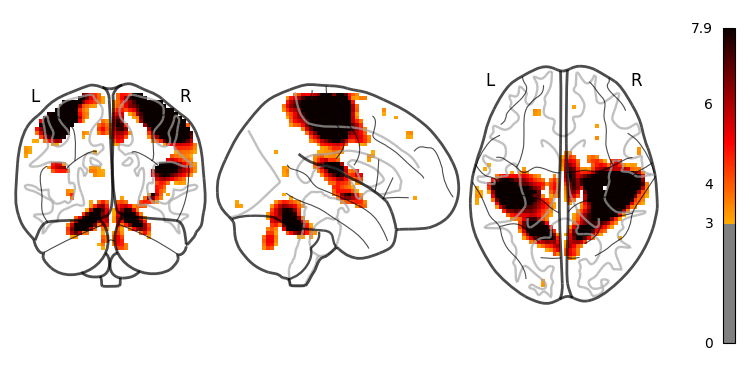

In [ ]:
# Plot statistical maps in a glass brain
plotting.plot_glass_brain(sma_file, threshold=3)

## Making Interactive Visualizations

The Nilearn **`view_img`** function is used to create interactive 3D visualizations of brain volumes directly in a web browser or Jupyter Notebook.

#### Example Usage

We work with a file containing a single, pre-computed 3D NIfTI image showing motor activation.<br>
We loaded the dataset in a previous example above.

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



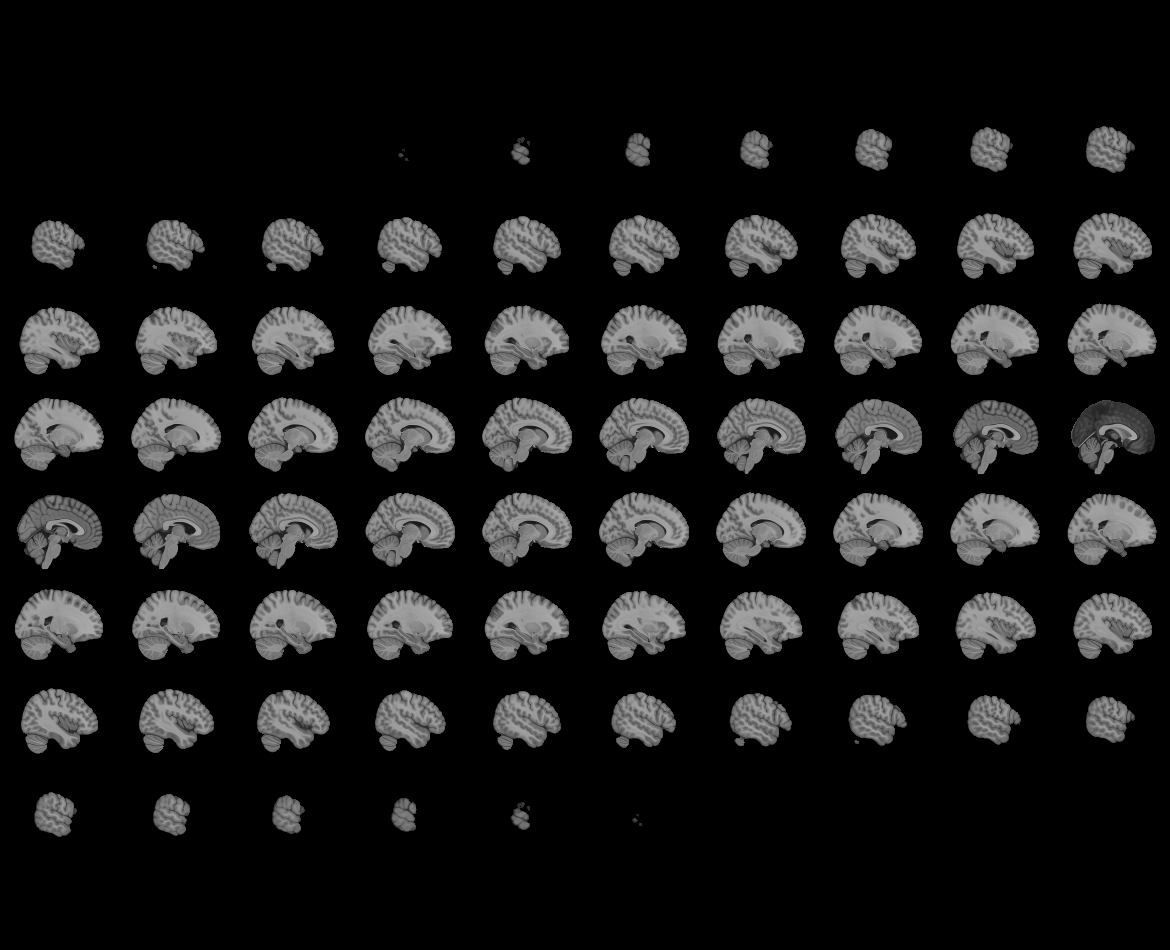
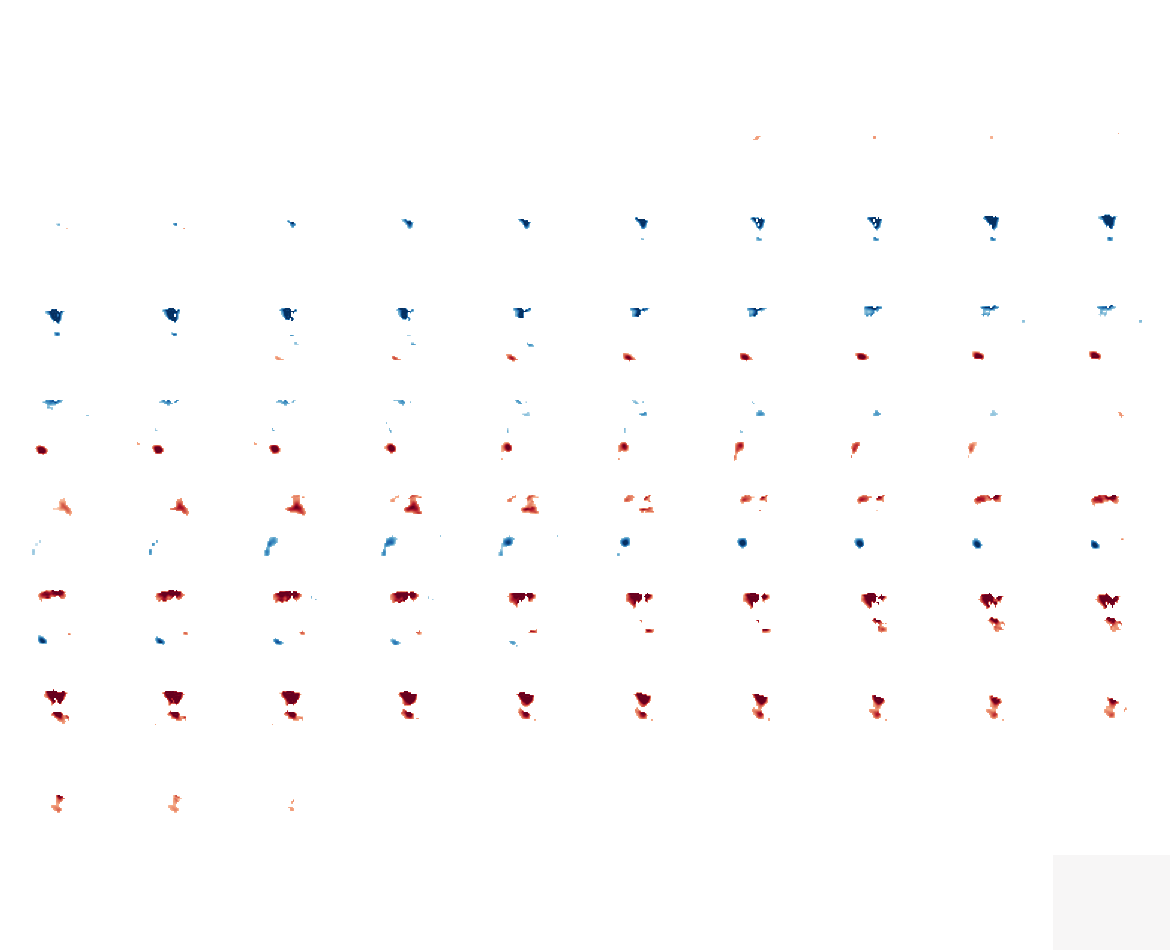

In [11]:
# Launch the interactive viewer
view = plotting.view_img(sma_file, threshold=3)
view

## Plotting Anatomical Images

### The **`plot_anat`** Function

**`plot_anat`** function is a core tool in Nilearn used to visualize anatomical MRI images by plotting 2D "cuts" of a 3D brain volume.

#### Example Usage

We use an anatomical image of haxby dataset.

We fetch the haxby dataset:

In [12]:
# fetch haxby dataset
haxby_dataset = datasets.fetch_haxby()

[fetch_haxby] Dataset created in /root/nilearn_data/haxby2001

[fetch_haxby] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 81641472 of 291168628 bytes (28.0%%,    2.6s remaining)

[fetch_haxby] Downloaded 181886976 of 291168628 bytes (62.5%%,    1.2s remaining)

[fetch_haxby] Downloaded 285999104 of 291168628 bytes (98.2%%,    0.1s remaining)

[fetch_haxby]  ...done. (3 seconds, 0 min)

[fetch_haxby] Extracting data from 
/root/nilearn_data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[fetch_haxby] .. done.

We plot a selected anatomical image from the haxby dataset:

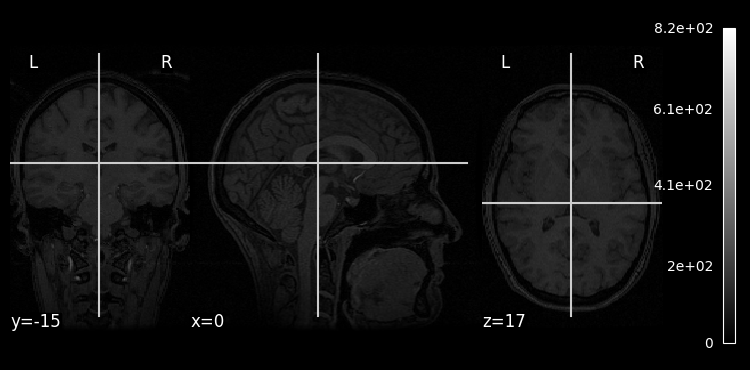

In [13]:
# get anatomical image from haxby dataset
haxby_anat_filename = haxby_dataset.anat[0]

# plot anatomical image
plotting.plot_anat(haxby_anat_filename)

## Plotting ROIs

### The **`plot_roi`** Function

**`plot_roi`** is a specialized function for visualizing Regions of Interest (ROIs) or masks as semi-transparent colored overlays on top of a background anatomical image.

#### Example Usage

We visualize ventral temporal cortex image from haxby dataset overlaid on subject specific anatomical image with coordinates positioned automatically on region of interest (roi).

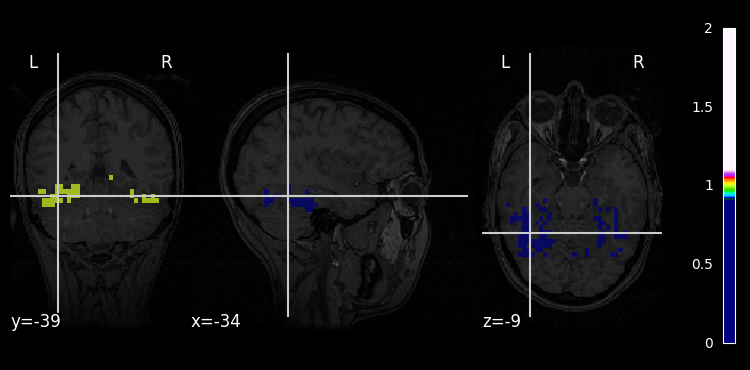

In [14]:
# get mask image from haxby dataset
haxby_mask_filename = haxby_dataset.mask_vt[0]

# plot mask
plotting.plot_roi(haxby_mask_filename, bg_img=haxby_anat_filename)

## Plotting EPI Image

### The **`plot_epi`** Function

**`plot_epi`** is a specialized function for visualizing functional MRI (Echo Planar Imaging: EPI) volumes.

It is optimized to handle the lower contrast and resolution typical of raw functional data compared to anatomical images.

#### Key Features

* 3D Input Requirement: It accepts a 3D Niimg-like object. Since fMRI data is typically 4D (time series), you must first extract a single volume, often by calculating the mean image.
* Default Visualization: By default, it displays an orthogonal view (sagittal, coronal, and axial cuts) of the brain.
* Visual Optimization: It uses specific heuristics and colormaps (often grayscale or "hot" by default) to make functional structures more visible.

#### Example Usage

We use the haxby dataset.

We compute the voxel_wise mean of functional images across time, which reduces the functional image from 4D to 3D.


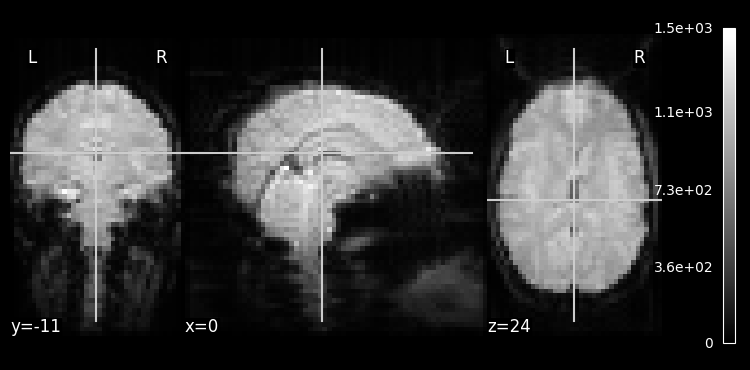

In [15]:
# get functional image from haxby dataset
haxby_func_filename = haxby_dataset.func[0]

# compute mean across time
mean_haxby_img = image.mean_img(haxby_func_filename)

# plot mean image (3D)
plotting.plot_epi(mean_haxby_img)


## Thresholding Plots

Using the **`threshold`** parameter alongside with **`vmin`** and **`vmax`** parameters enable us to mask certain values in the image.

### Plotting Without Threshold


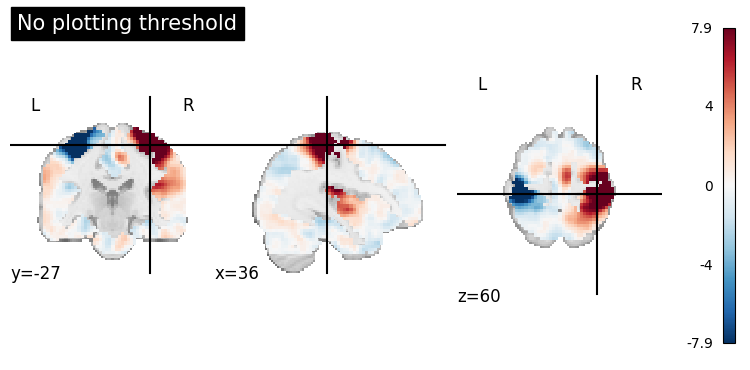

In [16]:
# plot without threshold
plotting.plot_stat_map(
    sma_file,
    display_mode="ortho",
    cut_coords=[36, -27, 60],
    title="No plotting threshold",
)

### Plotting With Threshold

We set the plotting threshold to 1, which masks the values between -1 and 1 in the plot.



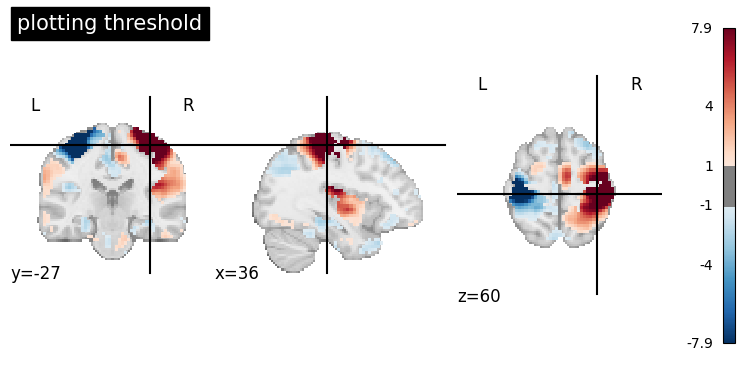

In [19]:
# plot with threshold
plotting.plot_stat_map(
    sma_file,
    threshold=1,
    display_mode="ortho",
    cut_coords=[36, -27, 60],
    title="plotting threshold",
)

#### Setting **`vmin`** Paramater

We set the **`vmin`** to zero to plot only positive image values.

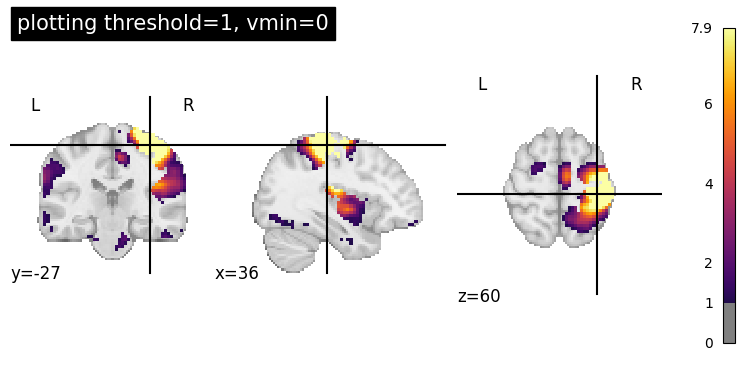

In [20]:
plotting.plot_stat_map(
    sma_file,
    threshold=1,
    cmap="inferno",
    display_mode="ortho",
    cut_coords=[36, -27, 60],
    title="plotting threshold=1, vmin=0",
    vmin=0,
)

#### Setting **`vmax`** Paramater

We set the **`vmax`** to zero to plot only positive image values.

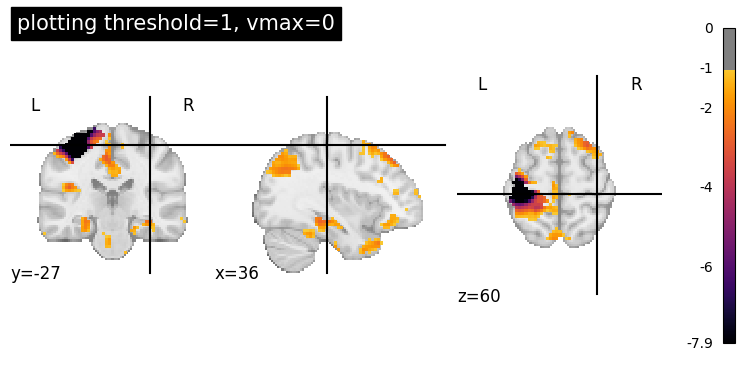

In [21]:
plotting.plot_stat_map(
    sma_file,
    threshold=1,
    cmap="inferno",
    display_mode="ortho",
    cut_coords=[36, -27, 60],
    title="plotting threshold=1, vmax=0",
    vmax=0,
)